In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [16]:
import os
os.getcwd()

'C:\\Users\\zzuge\\zzugest'

In [11]:
x1=pd.read_csv('C:\\Users\\zzuge\\X1.csv')
x2=pd.read_csv('C:\\Users\\zzuge\\X2.csv')
x3=pd.read_csv('C:\\Users\\zzuge\\X3.csv')
y=pd.read_csv('C:\\Users\\zzuge\\Y.csv')
datay=pd.read_csv('C:\\Users\\zzuge\\datay.csv')
data_matrix=pd.read_csv('C:\\Users\\zzuge\\data_matrix.csv')
lon=pd.read_csv('C:\\Users\\zzuge\\lon10.csv')
lat=pd.read_csv('C:\\Users\\zzuge\\lat10.csv')

In [142]:
data_matrix=np.array(data_matrix).flatten()

In [143]:
data_matrix

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
x1=np.array(x1).flatten()
x2=np.array(x2).flatten()
x3=np.array(x3).flatten()
y=np.array(y).flatten()
lon=np.array(lon).flatten()
lat=np.array(lat).flatten()

In [52]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
df=pd.DataFrame({'y':y,'x1':x1,'x2':x2,'x3':x3})
df

,y,x1,x2,x3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
249995,0.0,0.0,0.0,0.0
249996,0.0,0.0,0.0,0.0
249997,0.0,0.0,0.0,0.0
249998,0.0,0.0,0.0,0.0


In [18]:
df=df[~(df['y']==0)]

In [24]:
df

,y,x1,x2,x3
53697,2.0,0.000,0.000,0.000
55114,2.0,0.000,0.000,0.000
55137,3.0,21.420,0.000,0.000
57649,1.0,0.000,0.000,0.000
59726,2.0,0.000,0.000,0.000
...,...,...,...,...
175082,2.0,4.374,4.374,4.374
177069,2.0,0.000,0.000,0.000
188293,2.0,0.000,0.000,0.000
214126,1.0,0.000,0.000,0.000


In [25]:
from sklearn.preprocessing import StandardScaler  
x = df.drop(['y'], axis=1)
y = df['y']

x = StandardScaler().fit_transform(x)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents)

In [27]:
pca.explained_variance_ratio_

array([0.85001126, 0.12782339, 0.02216535])

<BarContainer object of 3 artists>

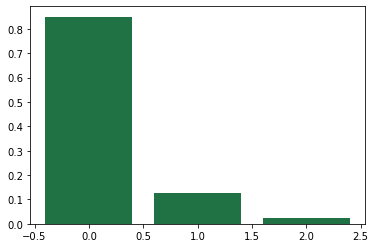

In [32]:
plt.bar(range(0,3), pca.explained_variance_ratio_)

In [160]:
principalDf

,0,1,2
0,-1.376903,0.011792,-0.037412
1,-1.308383,-0.047249,-0.082464
2,-1.441124,-0.013636,-0.041840
3,-1.376872,0.025540,-0.044367
4,-1.442591,-0.013791,-0.043072
...,...,...,...
188,-1.029341,0.136602,-0.095219
189,-1.384548,-0.015150,-0.053015
190,-1.382620,-0.039640,0.033693
191,-1.398650,-0.032865,0.013284


In [22]:
colors = ["#207245"]
sns.set_palette(sns.color_palette(colors))


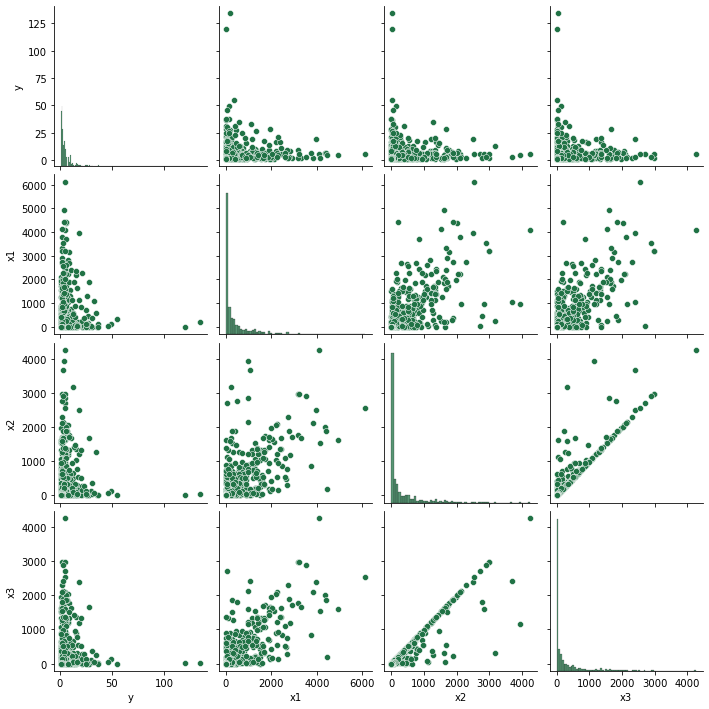

In [23]:
sns.pairplot(df)
plt.show()

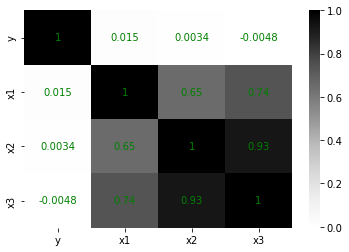

In [21]:
ax = sns.heatmap(df.corr(), annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()


In [12]:
logdf=np.log1p(df)

In [13]:
logdf

,x1,x2,x3,y
53697,0.000000,0.000000,0.000000,1.098612
55114,0.000000,0.000000,0.000000,1.098612
55137,3.109953,0.000000,0.000000,1.386294
57649,0.000000,0.000000,0.000000,0.693147
59726,0.000000,0.000000,0.000000,1.098612
...,...,...,...,...
175082,1.681573,1.681573,1.681573,1.098612
177069,0.000000,0.000000,0.000000,1.098612
188293,0.000000,0.000000,0.000000,1.098612
214126,0.000000,0.000000,0.000000,0.693147


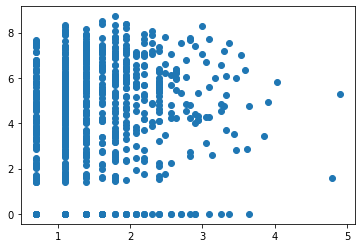

In [14]:
plt.scatter(logdf['y'],logdf['x1'])
plt.show()

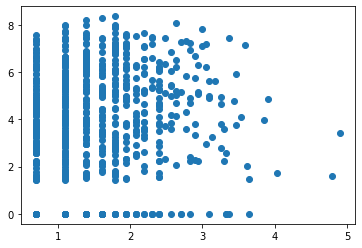

In [15]:
plt.scatter(logdf['y'],logdf['x2'])
plt.show()

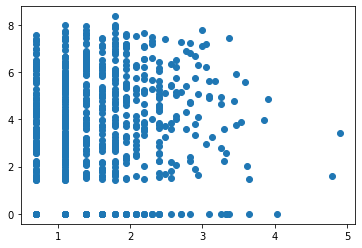

In [16]:
plt.scatter(logdf['y'],logdf['x3'])
plt.show()

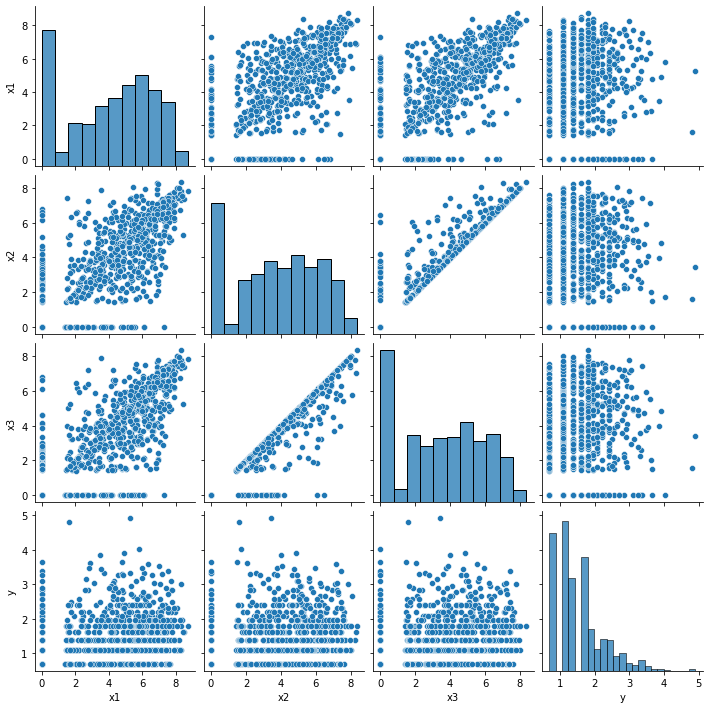

In [17]:
sns.pairplot(logdf)
plt.show()

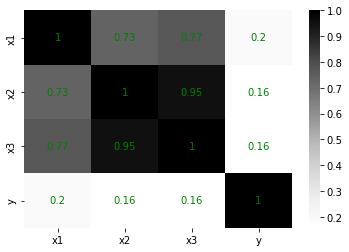

In [18]:
ax = sns.heatmap(logdf.corr(), annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()


In [57]:
from statsmodels.formula.api import ols 


model = ols('y ~ 0+x1+x2',data=df)
res=model.fit()

In [58]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.674
Method:                 Least Squares   F-statistic:                              200.8
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                    1.11e-47
Time:                        13:47:18   Log-Likelihood:                         -867.20
No. Observations:                 193   AIC:                                      1738.
Df Residuals:                     191   BIC:                                      1745.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0020      0.000      9.886      0.000       0.002       0.002
x2             0.0002      0.000      0.839      0.403      -0.000       0.001
==============================================================================
Omnibus:                      120.698   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1169.966
Skew:                           2.203   Prob(JB):                    8.81e-255
Kurtosis:                      14.229   Cond. No.                         3.55
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
x1=pd.read_csv('C:\\Users\\zzuge\\X1.csv')
x2=pd.read_csv('C:\\Users\\zzuge\\X2.csv')
x3=pd.read_csv('C:\\Users\\zzuge\\X3.csv')
y=pd.read_csv('C:\\Users\\zzuge\\Y.csv')
lon10=pd.read_csv('C:\\Users\\zzuge\\lon10.csv')
lat10=pd.read_csv('C:\\Users\\zzuge\\lat10.csv')

In [73]:
x1=np.array(x1).flatten()
x2=np.array(x2).flatten()
x3=np.array(x3).flatten()
y=np.array(y).flatten()
lon10=np.array(lon10).flatten()
lat10=np.array(lat10).flatten()

In [74]:
df=pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'y':y,'lat':lat10,'lon':lon10})
df

,x1,x2,x3,y,lat,lon
0,0.0,0.0,0.0,0.0,37.001,127.001
1,0.0,0.0,0.0,0.0,37.001,127.002
2,0.0,0.0,0.0,0.0,37.001,127.003
3,0.0,0.0,0.0,0.0,37.001,127.004
4,0.0,0.0,0.0,0.0,37.001,127.005
...,...,...,...,...,...,...
249995,0.0,0.0,0.0,0.0,37.500,127.496
249996,0.0,0.0,0.0,0.0,37.500,127.497
249997,0.0,0.0,0.0,0.0,37.500,127.498
249998,0.0,0.0,0.0,0.0,37.500,127.499


In [76]:
df=df[~(df['y']==0)]

In [77]:
df

,x1,x2,x3,y,lat,lon
53697,0.000,0.000,0.000,2.0,37.108,127.198
55114,0.000,0.000,0.000,2.0,37.111,127.115
55137,21.420,0.000,0.000,3.0,37.111,127.138
57649,0.000,0.000,0.000,1.0,37.116,127.150
59726,0.000,0.000,0.000,2.0,37.120,127.227
...,...,...,...,...,...,...
175082,4.374,4.374,4.374,2.0,37.351,127.083
177069,0.000,0.000,0.000,2.0,37.355,127.070
188293,0.000,0.000,0.000,2.0,37.377,127.294
214126,0.000,0.000,0.000,1.0,37.429,127.127


In [78]:
df['y_predict']=res.predict(df[['x1','x2']])

C:\Users\zzuge\AppData\Local\Temp\ipykernel_11072\2839216154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_predict']=res.predict(df[['x1','x2']])


In [79]:
df

,x1,x2,x3,y,lat,lon,y_predict
53697,0.000,0.000,0.000,2.0,37.108,127.198,0.000000
55114,0.000,0.000,0.000,2.0,37.111,127.115,0.000000
55137,21.420,0.000,0.000,3.0,37.111,127.138,0.043693
57649,0.000,0.000,0.000,1.0,37.116,127.150,0.000000
59726,0.000,0.000,0.000,2.0,37.120,127.227,0.000000
...,...,...,...,...,...,...,...
175082,4.374,4.374,4.374,2.0,37.351,127.083,0.009819
177069,0.000,0.000,0.000,2.0,37.355,127.070,0.000000
188293,0.000,0.000,0.000,2.0,37.377,127.294,0.000000
214126,0.000,0.000,0.000,1.0,37.429,127.127,0.000000


In [86]:
df.to_csv('C:\\Users\\zzuge\\충전소 예측값.csv')

In [81]:
df['y_predict']

0.000000    100
0.855972      1
1.023087      1
2.576224      1
0.009094      1
           ... 
0.608683      1
0.006266      1
0.008765      1
0.048619      1
0.009819      1
Name: y_predict, Length: 675, dtype: int64

In [36]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,컬럼,VIF
0,x1,18.299830
1,x2,5.260067
2,x3,25.891192


In [22]:
fitted=res.predict(df)

In [23]:
residual=df['y']-fitted

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


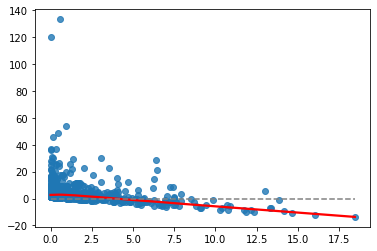

In [24]:
#모형의 선형성, 빨간 실선이 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라진다는 뜻 = 선형성이 없다.
sns.regplot(fitted,residual,lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()],[0,0],'--',color='grey')

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


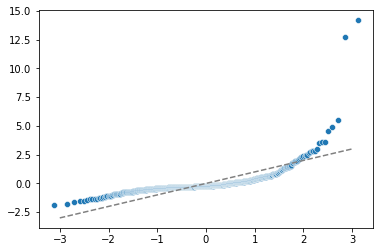

In [25]:
#잔차의 정규성, 잔차가 정규분포를 띄면 점들이 점선을 따라 배치되어 있어야 한다.
import scipy.stats
sr= scipy.stats.zscore(residual)
(x,y),_=scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--',color='grey')

In [26]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.5237042903900146, pvalue=2.735054342669178e-41)

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

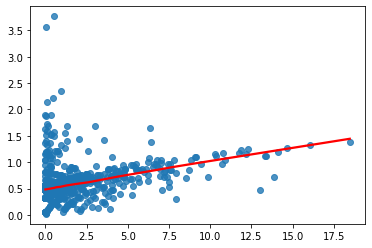

In [27]:
#잔차의 등분산성 , 빨간 실선이 수평선에 가까울수록 등분산성이 있다.
sns.regplot(fitted,np.sqrt(np.abs(sr)),lowess=True,line_kws={'color':'red'})

In [30]:
from statsmodels.formula.api import ols


logmodel = ols('y ~ 0+x1+x2+x3',data=logdf)
logres=logmodel.fit()

In [31]:
logres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.680
Method:                 Least Squares   F-statistic:                              548.9
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                   8.19e-191
Time:                        11:57:55   Log-Likelihood:                         -1067.5
No. Observations:                 774   AIC:                                      2141.
Df Residuals:                     771   BIC:                                      2155.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1948      0.020      9.944      0.000       0.156       0.233
x2             0.3094      0.044      7.018      0.000       0.223       0.396
x3            -0.2116      0.048     -4.397      0.000      -0.306      -0.117
==============================================================================
Omnibus:                       43.925   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.466
Skew:                           0.563   Prob(JB):                     6.67e-12
Kurtosis:                       3.573   Cond. No.                         14.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(logmodel.exog, i)} 
             for i, column in enumerate(logmodel.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,x1,7.404276
1,x2,32.477984
2,x3,35.121242


In [33]:
fitted=logres.predict(df)

In [34]:
residual=df['y']-fitted

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


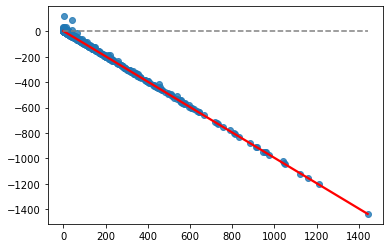

In [35]:
#모형의 선형성 
sns.regplot(fitted,residual,lowess=True, line_kws={'color':'red'})
plt.plot([fitted.min(),fitted.max()],[0,0],'--',color='grey')

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


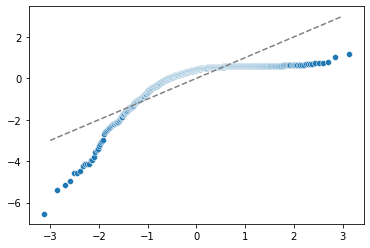

In [36]:
#잔차의 정규성
import scipy.stats
sr= scipy.stats.zscore(residual)
(x,y),_=scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3],[-3,3],'--',color='grey')

In [37]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.6546320915222168, pvalue=8.20417965279721e-37)

C:\Users\zzuge\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

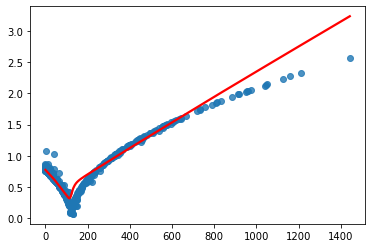

In [38]:
#잔차의 등분산성
sns.regplot(fitted,np.sqrt(np.abs(sr)),lowess=True,line_kws={'color':'red'})